<a href="https://colab.research.google.com/github/smesindianou/homeworks/blob/main/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import spacy

In [ ]:
# !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 98.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all/all_data.csv')

In [ ]:
ttd = data[data['Μέσο'] == 'The Toc']
ttd = ttd[ttd['year'] == 2024]
ttd

,date,text,section,Μέσο,year_month,year,month
108,2024-12-30,Το τέλος του woke Ο χαρακτηρισμός της Ελλάδας ...,Απόψεις,The Toc,2024-12,2024,12
116,2024-12-07,"Αμπελόκηποι: ""Θα μου χαλάσεις τη δουλειά"" - Η ...",Ελλάδα,The Toc,2024-12,2024,12
124,2024-12-06,Γυναικοκτονία στους Αμπελόκηπους: Τα παιδιά κο...,Ελλάδα,The Toc,2024-12,2024,12
127,2024-12-06,"Γυναικοκτονία στους Αμπελόκηπους: ""Μου είπε ότ...",Ελλάδα,The Toc,2024-12,2024,12
128,2024-12-06,"Αμπελόκηποι: ""Δεν θα ξαναγυρίσω σπίτι"" - Παρίσ...",Ελλάδα,The Toc,2024-12,2024,12
...,...,...,...,...,...,...,...
663,2024-01-09,"Θρησκόληπτος, αντιεμβολιαστής και βίαιος ο 39χ...",Ελλάδα,The Toc,2024-01,2024,1
664,2024-01-09,Καλλιακμάνης για γυναικοκτονία στη Θεσσαλονίκη...,Ελλάδα,The Toc,2024-01,2024,1
665,2024-01-09,Αποκαλύψεις σοκ για τη δολοφονίας της 41χρονης...,Ελλάδα,The Toc,2024-01,2024,1
666,2024-01-09,Σκέρτσος: Αύριο θα ανακοινωθούν δράσεις για τη...,Πολιτικη & Οικονομια,The Toc,2024-01,2024,1


In [ ]:
###

ttd_text = ttd['text'].str.cat(sep = ' ')
ttd_text = ttd_text.lower()
ttd_text = ttd_text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('  ', ' ')
#

In [ ]:
###

ttd_doc = nlp(ttd_text)
ttd_tokenized_doc = ' '.join(token.lemma_ for token in ttd_doc)

In [ ]:
# function δημιουργίας wordcloud
def create_wordcloud(text):
  custom_words =['γυναικοκτονία','γυναίκα', 'Ελλάδα', 'σύμφωνα', 'είπε',
                 'thetoc gr', 'gr', 'ελ', 'λέγω', 'είπε', 'υπάρχει', 'κάνω', 'κόσμος', 'thetoc', 'πρόσφατος', 'ειδήσεις', 'διαβάστε',
                 'ό', 'υπάρχω', 'είδηση', 'ή', 'συμβαίνω', 'γίνομαι', 'αφήνω', 'απε μπε', 'νεκταρία', 'γυναίκα', 'θεσσαλονίκη', 'θέλω', 'μπορώ', 'αναφέρω', 'αστυνομικός', 'περιπολικός', 'γυναίκο',
                 'τμήμα', 'Κυριακή', 'τηλέφωνος', 'αγίων', 'αναργύρος']
  for word in custom_words:
    nlp.Defaults.stop_words.add(word)
  wordcloud = WordCloud(
      stopwords = nlp.Defaults.stop_words, # <- τα stopwords που θέλουμε να "κοπούν"
      width = 2000,
      height = 1000,
      background_color = 'black'
  ).generate(text) # <- μέσα στην παρένθεση βάζουμε το όνομα της μεταβλητής που έχουμε βάλει στα arguements που δέχεται το function
  return wordcloud

In [ ]:
# function δημιουργίας της εικόνας του wordcloud
def create_wordcloud_img(text):
  wordcloud = create_wordcloud(text) # δημιουργία του wordcloud με το παραπάνω function
  # δημιουργία της εικόνας του wordcloud
  fig = plt.figure(
      figsize = (40, 30),
      facecolor = 'k',
      edgecolor = 'k')
  return plt.imshow(wordcloud)

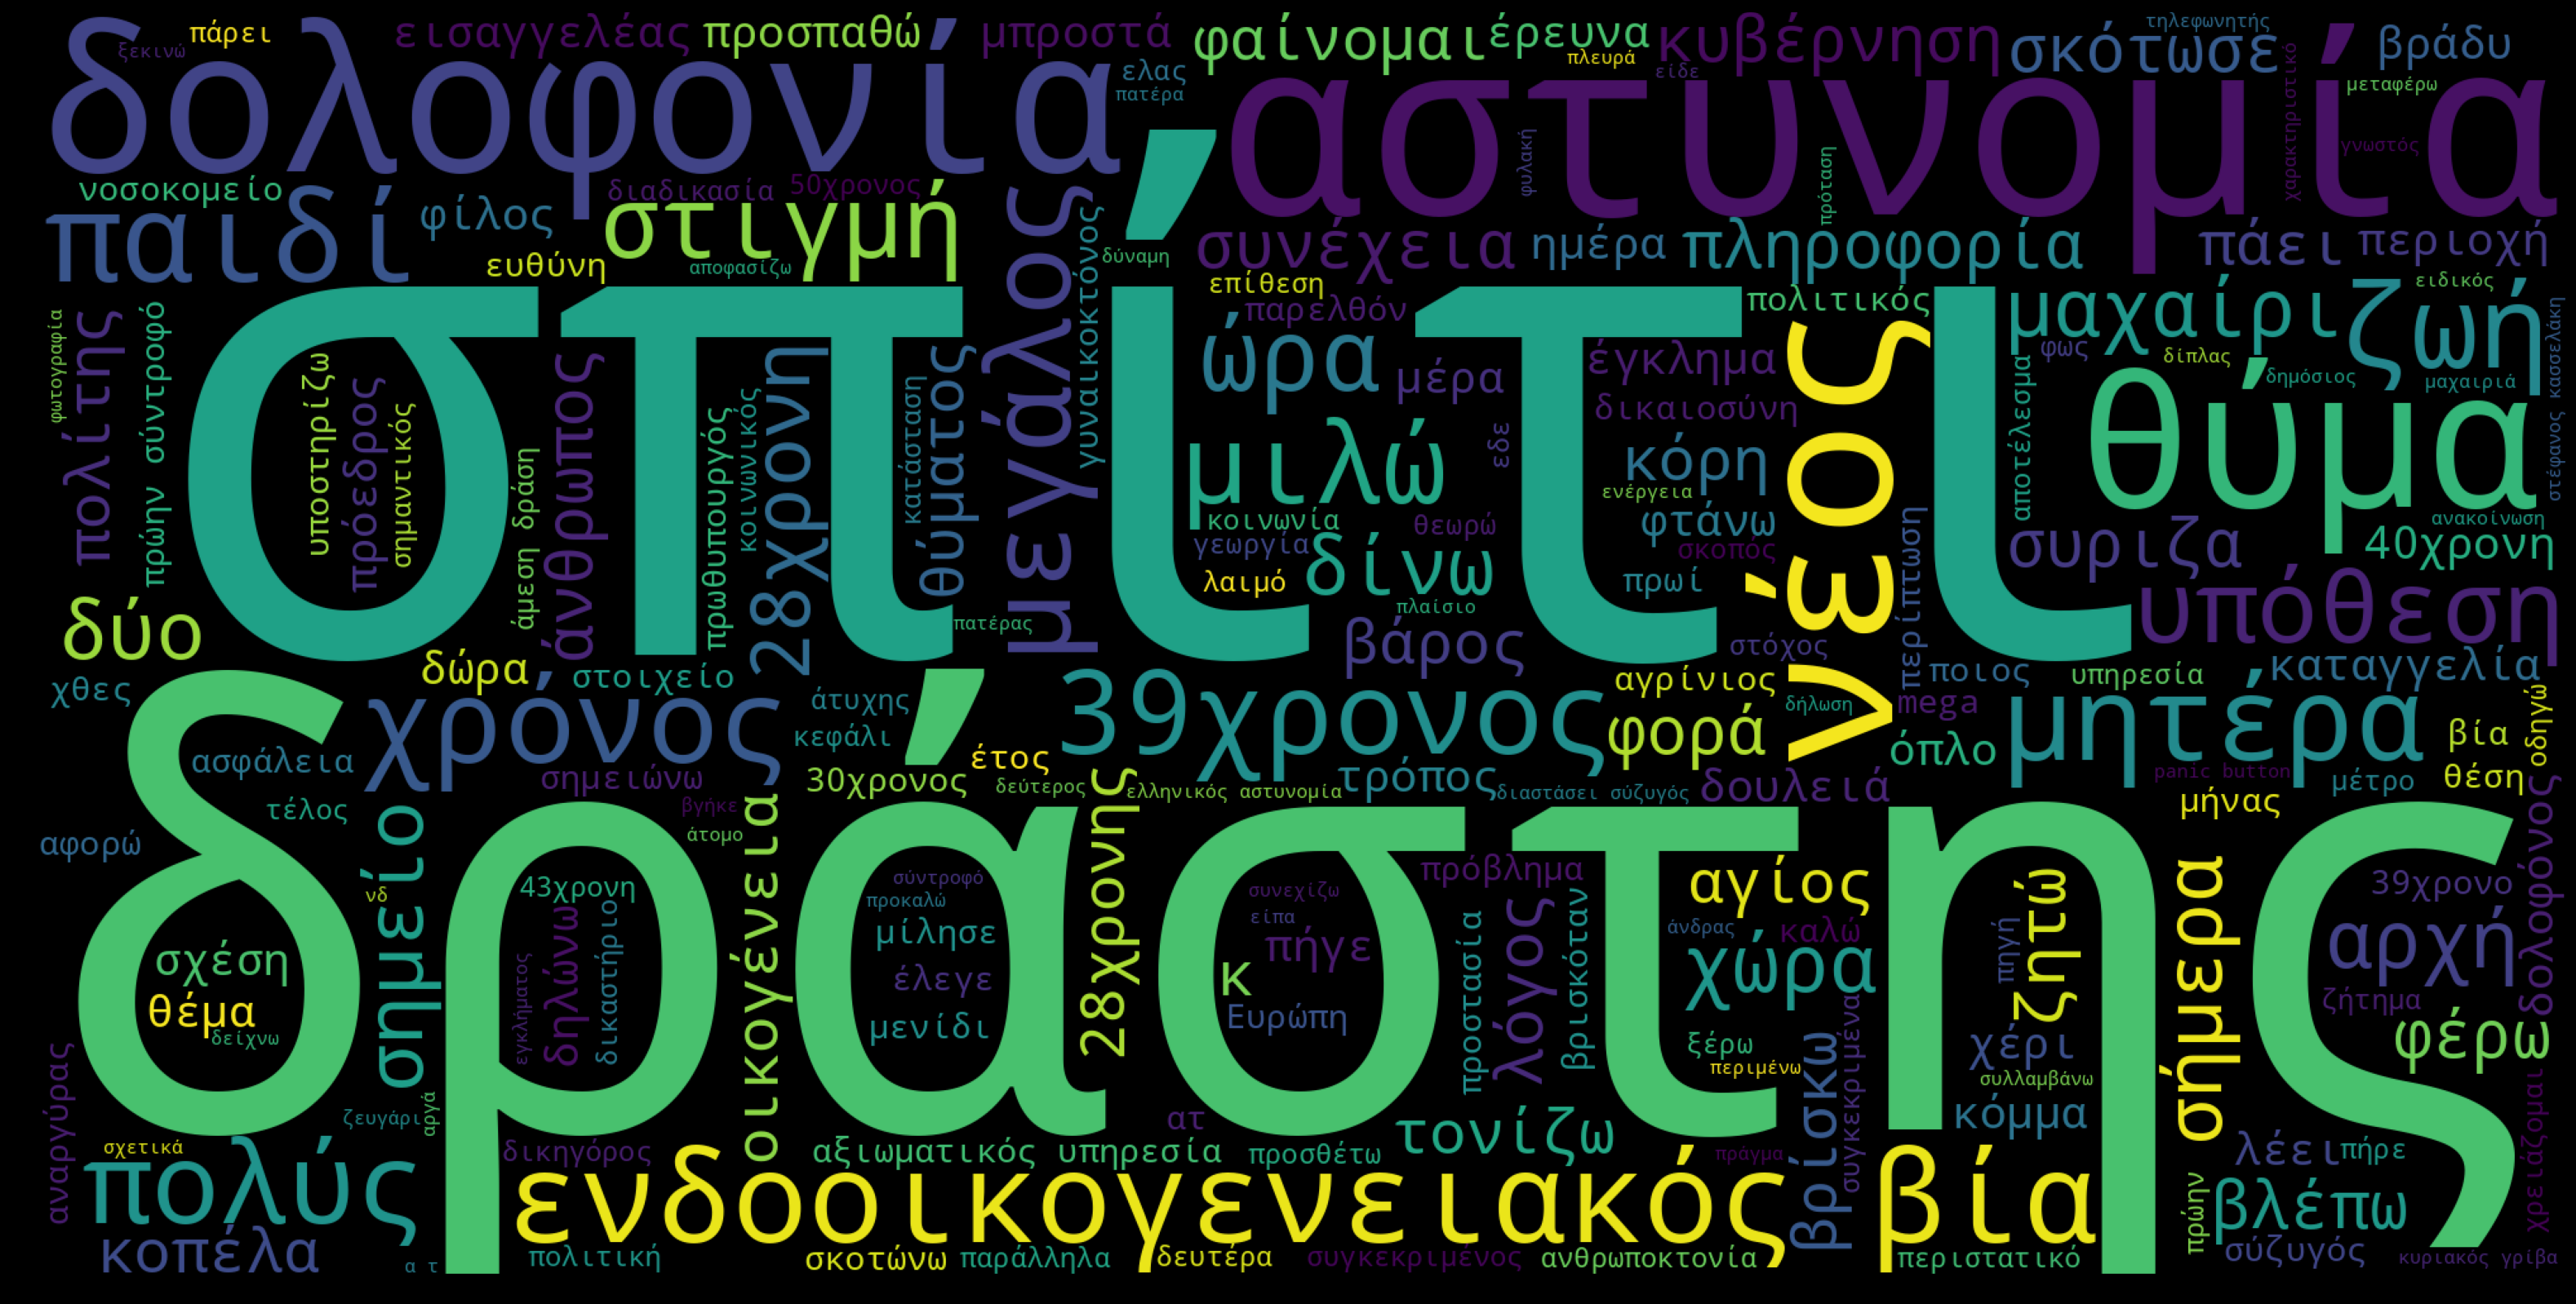

In [ ]:
create_wordcloud_img(ttd_tokenized_doc)